<a href="https://colab.research.google.com/github/Qudn1m/FRPKM/blob/main/FRPKM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bagian Per Install-an

In [ ]:
!pip install ffmpeg-python
!pip install numpy==1.26.4
!git clone https://github.com/opencv/opencv.git
!mkdir Video
!pip install --upgrade --force-reinstall opencv-python

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.13.0.92 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
rasterio 1.5.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
tobler 0.13.0 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
pytensor 2.37.0 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>

fatal: destination path 'opencv' already exists and is not an empty directory.
mkdir: cannot create directory ‘Video’: File exists
  Using cached opencv_python-4.13.0.92-cp37-abi3-manylinux_2_28_x86_64.whl.metadata (19 kB)
  Using cached numpy-2.4.2-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (6.6 kB)
Using cached opencv_python-4.13.0.92-cp37-abi3-manylinux_2_28_x86_64.whl (72.9 MB)
Using cached numpy-2.4.2-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.13.0.92
    Uninstalling opencv-python-4.13.0.92:
      Successfully uninstalled opencv-python-4.13.0.92
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the followin

#Bagian per-upload-an
##Untuk model doang
upload file dengan nama: keras_model.h5 sama labels.txt yang dikirim di wa

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving keras_model.h5 to keras_model.h5
Saving labels.txt to labels.txt


#Bagian Per import-an

In [ ]:
from IPython.display import HTML, Javascript, Video, display, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import numpy as np
import time
import matplotlib.pyplot as plt
import io
from io import BytesIO
import os
import ffmpeg
import cv2
from PIL import Image

#Dataset
Note: Not in use

In [ ]:
import kagglehub

path = kagglehub.dataset_download("ashwingupta3012/human-faces")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'human-faces' dataset.
Path to dataset files: /kaggle/input/human-faces


#Computer Visual Based on Captured Video/Recorded session

##Snippet Kode untuk membuka kamera dan merekam video

In [ ]:
video_file_test = '/content/Video/osy_test.mp4'

VIDEO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var my_btn_txt = document.createTextNode("Press to start recording");
my_btn.appendChild(my_btn_txt);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);
var base64data = 0;
var reader;
var recorder, videoStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  videoStream = stream;
  var options = {
    mimeType : 'video/webm;codecs=vp9'
  };
  recorder = new MediaRecorder(stream, options);

  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('video');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);
    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";
navigator.mediaDevices.getUserMedia({video: true}).then(handleSuccess);

function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      videoStream.getVideoTracks()[0].stop(); // Stop the video stream
      recordButton.innerText = "Saving the recording... Please wait!"
  }
}

function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
recordButton.onclick = ()=>{
toggleRecording()
sleep(2000).then(() => {
  // wait 2000ms for the data to be available
  resolve(base64data.toString())
});
}
});

</script>
"""

In [ ]:
# @title
from google.colab import drive
drive.mount('/content/drive')

##Snippet Kode untuk menggunakan recorded video

In [ ]:
def start_webcam():
  js = Javascript('''
    async function startWebcam() {
      const div = document.createElement('div');
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      return;
    }
    ''')

  display(js)
  data = eval_js('startWebcam()')


def get_video():
  display(HTML(VIDEO_HTML))
  data = eval_js("data")

  if isinstance(data, str) and ',' in data:
    binary = b64decode(data.split(',')[1])
    with open('temp_video.mp4', 'wb') as f:
      f.write(binary)
    return None
  else:
    print("Error: Video data not captured correctly.")
    binary = None
    return None

def face_tracking(video_path, face_dataset_path="/kaggle/input/human-faces"):
    cascade_path = 'haarcascade_frontalface_default.xml'
    if not os.path.exists(cascade_path):
        !wget -q https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

    face_cascade = cv2.CascadeClassifier(cascade_path)
    cap = cv2.VideoCapture(video_path)

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5, minSize=(60, 60))

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        if frame_count % 30 == 0:
            _, buffer = cv2.imencode('.jpg', frame)
            display(Image(data=buffer))

        frame_count += 1

    cap.release()
    cv2.destroyAllWindows()


start_webcam()
get_video()

<IPython.core.display.Javascript object>

Jangan dipakai

In [ ]:
# @title
def face_tracking(video_path, face_dataset_path="/kaggle/input/human-faces"):
    cascade_path = 'haarcascade_frontalface_default.xml'
    if not os.path.exists(cascade_path):
        !wget -q https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

    face_cascade = cv2.CascadeClassifier(cascade_path)
    cap = cv2.VideoCapture(video_path)

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5, minSize=(60, 60))

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        if frame_count % 30 == 0:
            _, buffer = cv2.imencode('.jpg', frame)
            display(Image(data=buffer))

        frame_count += 1

    cap.release()
    cv2.destroyAllWindows()

##Snippet Kode untuk Menampilkan grafik pergerakan dari rekaman video yang disimpan

###Bagian pixel (saved video)

In [ ]:
if not os.path.exists('haarcascade_frontalface_default.xml'):
    print("Mengunduh Haar Cascade untuk deteksi wajah...")
    !wget -q https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
if face_cascade.empty():
    raise RuntimeError("Gagal memuat Haar Cascade. Pastikan file terunduh dengan benar.")
video_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/alpan.mp4'
if not os.path.exists(video_path):
    print(f"Error: File video tidak ditemukan di {video_path}")
    print("Pastikan Anda sudah menjalankan Cell 4 untuk merekam video")
else:
    print(f"Memproses video dari: {video_path}")
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Tidak dapat membuka file video")
    else:
        frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps = cap.get(cv2.CAP_PROP_FPS)
        output_path = '/content/Video/processed_video.mp4'
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))
        prev_center = None
        max_displacement = 20.0
        movement_history = []
        frame_count = 0
        movement_intensities = []
        timestamps = []

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            frame_count += 1
            timestamp = frame_count / fps
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            faces = face_cascade.detectMultiScale(
                gray,
                scaleFactor=1.1,
                minNeighbors=5,
                minSize=(80, 80),
                flags=cv2.CASCADE_SCALE_IMAGE
            )

            tracker_color = (0, 255, 0)
            movement_status = "Stabil"
            current_intensity = 0.0

            if len(faces) > 0:
                (x, y, w, h) = faces[0]
                current_center = (x + w // 2, y + h // 2)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (200, 200, 200), 1)
                if prev_center is not None:
                    dx = current_center[0] - prev_center[0]
                    dy = current_center[1] - prev_center[1]
                    displacement = (dx**2 + dy**2)**0.5
                    movement_history.append(displacement)
                    if len(movement_history) > 30:
                        movement_history.pop(0)
                    avg_movement = sum(movement_history) / len(movement_history)
                    movement_intensities.append(avg_movement)
                    timestamps.append(timestamp)
                    if avg_movement > max_displacement * 0.7:
                        ratio = min(avg_movement / max_displacement, 1.0)
                        g = int(255 * (1 - ratio))
                        r = int(255 * ratio)
                        tracker_color = (0, g, r)
                        movement_status = "Pergerakan Tinggi"
                        current_intensity = ratio
                    elif avg_movement > max_displacement * 0.3:
                        tracker_color = (0, 150, 150)
                        movement_status = "Pergerakan Sedang"
                        current_intensity = avg_movement / max_displacement * 0.7
                prev_center = current_center
                cv2.putText(frame, f"Status: {movement_status}", (10, 30),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.7, tracker_color, 2)
                cv2.rectangle(frame, (x, y), (x + w, y + h), tracker_color, 2)
                cv2.circle(frame, current_center, 5, (255, 0, 0), -1)
            cv2.rectangle(frame, (10, 45), (200, 75), (50, 50, 50), -1)
            cv2.rectangle(frame, (10, 45), (int(10 + 190 * current_intensity), 75),
                         (0, 255, 0) if current_intensity < 0.3 else (0, 255, 255) if current_intensity < 0.7 else (0, 0, 255), -1)
            cv2.putText(frame, f"Intensitas: {current_intensity:.2f}", (25, 65),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
            out.write(frame)
        cap.release()
        out.release()
        print(f"Proses selesai. Video hasil analisis disimpan di: {output_path}")
        print("\nMenampilkan video hasil analisis:")
        display(Video(output_path, embed=True, width=600))
        if movement_intensities and timestamps:
            plt.figure(figsize=(10, 4))
            plt.plot(timestamps, movement_intensities, 'b-')
            plt.axhline(y=max_displacement*0.3, color='g', linestyle='--', label='Threshold Sedang')
            plt.axhline(y=max_displacement*0.7, color='r', linestyle='--', label='Threshold Tinggi')
            plt.title('Intensitas Pergerakan Kepala')
            plt.xlabel('Waktu (detik)')
            plt.ylabel('Perpindahan (pixel)')
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print("Tidak ada data pergerakan untuk divisualisasi")

Mengunduh Haar Cascade untuk deteksi wajah...
Error: File video tidak ditemukan di /content/drive/MyDrive/Colab Notebooks/Dataset/alpan.mp4
Pastikan Anda sudah menjalankan Cell 4 untuk merekam video


###Bagian Titik koordinat (saved video)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import Video, display
import time # Import time for delay

# Path video
video_path = '/content/temp_video.mp4'

if not os.path.exists(video_path):
    print(f"Error: File video tidak ditemukan di {video_path}")
else:
    print(f"Memproses video dari: {video_path}")
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Tidak dapat membuka file video")
    else:
        frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps = cap.get(cv2.CAP_PROP_FPS)
        # Ensure fps is not zero or negative before calculating delay
        if fps <= 0:
            print("Warning: Could not get valid FPS from video, defaulting to 30.")
            fps = 30.0
        frame_delay = 1/fps # Calculate delay per frame
        output_path = '/content/Video/processed_video.mp4'
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

        # Inisialisasi
        prev_point = None
        movement_history = []
        movement_intensities = []
        timestamps = []
        frame_count = 0
        max_displacement = 20.0

        # Simulasi titik koordinat kepala (misal: hasil tracking landmark)
        np.random.seed(42)
        simulated_head_positions = []

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            frame_count += 1
            timestamp = frame_count / fps

            #  misalkan kepala bergerak secara sinusoidal + sedikit noise
            x = int(frame_width // 2 + 50 * np.sin(timestamp * 2) + np.random.randint(-2, 3))
            y = int(frame_height // 2 + 10 * np.cos(timestamp * 2) + np.random.randint(-1, 2))
            current_point = (x, y)
            simulated_head_positions.append(current_point)

            tracker_color = (0, 255, 0)
            movement_status = "Stabil"
            current_intensity = 0.0

            # Hitung perpindahan antar frame
            if prev_point is not None:
                dx = current_point[0] - prev_point[0]
                dy = current_point[1] - prev_point[1]
                displacement = (dx**2 + dy**2)**0.5
                movement_history.append(displacement)

                # Simpan pergerakan rata-rata agar lebih stabil
                if len(movement_history) > 30:
                    movement_history.pop(0)
                avg_movement = sum(movement_history) / len(movement_history)
                movement_intensities.append(avg_movement)
                timestamps.append(timestamp)

                # Status gerakan
                if avg_movement > max_displacement * 0.7:
                    ratio = min(avg_movement / max_displacement, 1.0)
                    g = int(255 * (1 - ratio))
                    r = int(255 * ratio)
                    tracker_color = (0, g, r)
                    movement_status = "Pergerakan Tinggi"
                    current_intensity = ratio
                elif avg_movement > max_displacement * 0.3:
                    tracker_color = (0, 200, 200)
                    movement_status = "Pergerakan Sedang"
                    current_intensity = avg_movement / max_displacement * 0.7

            prev_point = current_point

            # Gambar titik koordinat pada frame
            cv2.circle(frame, current_point, 6, tracker_color, -1)
            cv2.putText(frame, f"Status: {movement_status}", (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, tracker_color, 2)

            # Bar intensitas
            cv2.rectangle(frame, (10, 45), (200, 75), (50, 50, 50), -1)
            cv2.rectangle(frame, (10, 45), (int(10 + 190 * current_intensity), 75),
                          (0, 255, 0) if current_intensity < 0.3 else (0, 255, 255) if current_intensity < 0.7 else (0, 0, 255), -1)
            cv2.putText(frame, f"Intensitas: {current_intensity:.2f}", (25, 65),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

            out.write(frame)

            # Add delay to match FPS
            time.sleep(frame_delay)


        cap.release()
        out.release()

        print(f"Proses selesai. Video hasil analisis disimpan di: {output_path}")
        display(Video(output_path, embed=True, width=600))

        # --- Visualisasi intensitas pergerakan ---
        if movement_intensities and timestamps:
            plt.figure(figsize=(10, 4))
            plt.plot(timestamps, movement_intensities, 'b-', label='Intensitas Gerak')
            plt.axhline(y=max_displacement * 0.3, color='g', linestyle='--', label='Threshold Sedang')
            plt.axhline(y=max_displacement * 0.7, color='r', linestyle='--', label='Threshold Tinggi')
            plt.title('Intensitas Pergerakan Kepala Berdasarkan Titik Koordinat')
            plt.xlabel('Waktu (detik)')
            plt.ylabel('Perpindahan (pixel)')
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print("Tidak ada data pergerakan untuk divisualisasi.")

Error: File video tidak ditemukan di /content/temp_video.mp4


#Computer Vision Based on Live Web Video with a premade model

---



In [ ]:
from google.colab import drive

# Extracted folder ID from the provided link
folder_id = 'insert folder id here'
mount_path = f'/My Drive/{folder_id}'

os.makedirs(mount_path, exist_ok=True)

try:
    drive.mount('/content/drive')
except MessageError as e:
    if 'credential propagation was unsuccessful' in str(e):
        print("Error: Credential propagation failed. Please try mounting again or check your internet connection.")
    else:
        print(f"An unexpected error occurred: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


specific_folder_path = os.path.join('My Drive', folder_id)
print(f"Your specific folder should be accessible at: {specific_folder_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Your specific folder should be accessible at: My Drive/insert folder id here


Caranya:
- Jalankan bagian per-install-an
- Jalankan bagian per-import-an
- Jalankan bagian Independent Testing Area

##Install tensorflow

In [ ]:
!pip install tensorflow

  Using cached numpy-2.1.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.1.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.2
    Uninstalling numpy-2.4.2:
      Successfully uninstalled numpy-2.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.3 which is incompatible.


##Update Model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import DepthwiseConv2D as OriginalDepthwiseConv2D
try:
    from google.colab.output import eval_js
    from IPython.display import display, Javascript, Image as DisplayImage
    from tensorflow.keras.models import load_model
    from tensorflow.keras.layers import DepthwiseConv2D as OriginalDepthwiseConv2D
except ImportError:
    print("FATAL ERROR: This script requires a Google Colab or IPython environment.")
    raise

##Custom Layer Wrapper

In [ ]:

class CustomDepthwiseConv2D(OriginalDepthwiseConv2D):
    """
    A wrapper to fix the 'groups' argument incompatibility during model loading.
    """
    @classmethod
    def from_config(cls, config):
        if 'groups' in config:
            print(f"INFO: Removing 'groups' argument from DepthwiseConv2D config to fix loading error.")
            del config['groups']
        return super().from_config(config)

custom_objects = {
    'DepthwiseConv2D': CustomDepthwiseConv2D
}

##Model live feed

INFO: Removing 'groups' argument from DepthwiseConv2D config to fix loading error.
INFO: Removing 'groups' argument from DepthwiseConv2D config to fix loading error.
INFO: Removing 'groups' argument from DepthwiseConv2D config to fix loading error.
INFO: Removing 'groups' argument from DepthwiseConv2D config to fix loading error.
INFO: Removing 'groups' argument from DepthwiseConv2D config to fix loading error.
INFO: Removing 'groups' argument from DepthwiseConv2D config to fix loading error.
INFO: Removing 'groups' argument from DepthwiseConv2D config to fix loading error.
INFO: Removing 'groups' argument from DepthwiseConv2D config to fix loading error.
INFO: Removing 'groups' argument from DepthwiseConv2D config to fix loading error.
INFO: Removing 'groups' argument from DepthwiseConv2D config to fix loading error.
INFO: Removing 'groups' argument from DepthwiseConv2D config to fix loading error.
INFO: Removing 'groups' argument from DepthwiseConv2D config to fix loading error.
INFO

<IPython.core.display.Javascript object>

Webcam started. Please wait a moment for video feed setup...


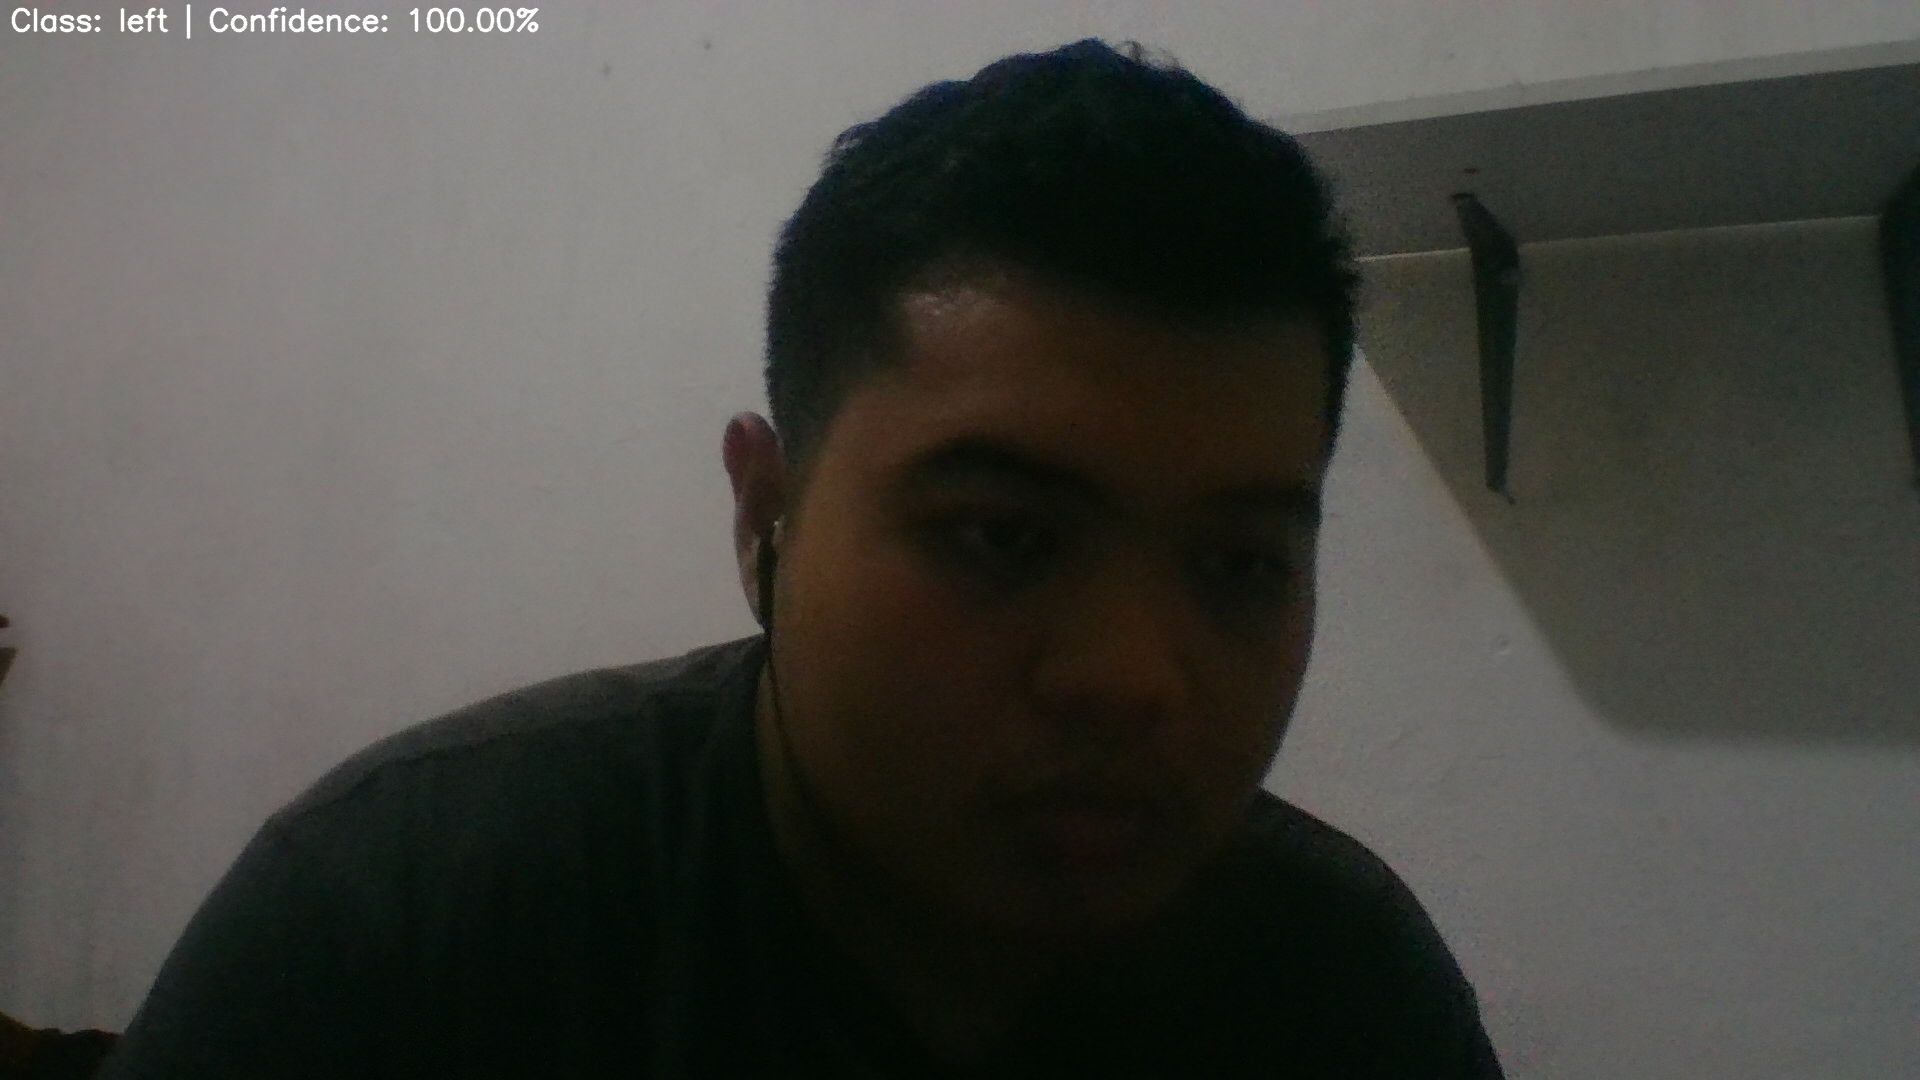


--- Starting Real-time Prediction (Press Ctrl+C to stop) ---

Prediction: hand blocked, Score: 75%
Prediction: camera blocked, Score: 86%
Prediction: camera blocked, Score: 72%
Prediction: camera blocked, Score: 68%
Prediction: camera blocked, Score: 77%
Prediction: camera blocked, Score: 78%
Prediction: camera blocked, Score: 87%
Prediction: camera blocked, Score: 59%
Prediction: camera blocked, Score: 85%
Prediction: camera blocked, Score: 93%
Prediction: camera blocked, Score: 97%
Prediction: camera blocked, Score: 97%
Prediction: camera blocked, Score: 91%
Prediction: camera blocked, Score: 99%
Prediction: camera blocked, Score: 99%
Prediction: camera blocked, Score: 99%
Prediction: camera blocked, Score: 94%
Prediction: camera blocked, Score: 87%
Prediction: camera blocked, Score: 87%
Prediction: camera blocked, Score: 86%
Prediction: camera blocked, Score: 70%
Prediction: camera blocked, Score: 82%
Prediction: camera blocked, Score: 89%
Prediction: camera blocked, Score: 84%
Pre

<IPython.core.display.Javascript object>

Webcam stream shut down.


In [ ]:
try:
    model = load_model("keras_model.h5", custom_objects=custom_objects, compile=False)
except Exception as e:
    print(f"Error loading model: {e}")
    # Exit script if model load fails
    exit()

np.set_printoptions(suppress=True)

try:
    with open("labels.txt", "r") as f:
        class_names = f.readlines()
except FileNotFoundError:
    print("Error: labels.txt not found.")
    exit()

def video_stream():
    """Starts the JavaScript video stream component."""
    js = Javascript('''
        var video;
        var div = null;
        var stream;
        var captureCanvas;
        var captureContext;

        async function setupWebcam() {
            if (div !== null) {
                return;
            }
            div = document.createElement('div');
            video = document.createElement('video');
            video.style.display = 'block';
            stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();
            captureCanvas = document.createElement('canvas');
            captureCanvas.width = video.videoWidth;
            captureCanvas.height = video.videoHeight;
            captureContext = captureCanvas.getContext('2d');
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
        }

        function captureFrame() {
            if (video) {
                captureCanvas.width = video.videoWidth;
                captureCanvas.height = video.videoHeight;
                captureContext.drawImage(video, 0, 0, video.videoWidth, video.videoHeight);
                return captureCanvas.toDataURL('image/jpeg', 0.8);
            } else {
                return '';
            }
        }

        setupWebcam();
        window.captureFrame = captureFrame;
    ''')
    display(js)

def capture_and_decode():
    b64_data = eval_js('captureFrame()')
    if not b64_data.startswith('data:image/jpeg;base64,'):
        return None

    base64_encoded_image = b64_data.split(',')[1]
    image_bytes = b64decode(base64_encoded_image)

    np_arr = np.frombuffer(image_bytes, np.uint8)
    image = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)

    return image

video_stream()
print("Webcam started. Please wait a moment for video feed setup...")
time.sleep(2)

output_handle = display(None, display_id=True)


try:
    print("\n--- Starting Real-time Prediction (Press Ctrl+C to stop) ---\n")
    while True:
        image = capture_and_decode()

        if image is None:
            print("Warning: Could not capture frame. Retrying...")
            time.sleep(0.5)
            continue

        processed_image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
        model_input = np.asarray(processed_image, dtype=np.float32).reshape(1, 224, 224, 3)
        model_input = (model_input / 127.5) - 1
        prediction = model.predict(model_input, verbose=0)
        index = np.argmax(prediction)
        class_name = class_names[index].strip()
        confidence_score = prediction[0][index]
        label_text = f"Class: {class_name[2:]} | Confidence: {np.round(confidence_score * 100):.2f}%"
        display_image = image.copy()
        cv2.putText(
            display_image,
            label_text,
            (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (255, 255, 255),
            2,
            cv2.LINE_AA,
        )

        _, jpeg = cv2.imencode('.jpeg', display_image)
        output_handle.update(DisplayImage(data=jpeg.tobytes()))
        print(f"Prediction: {class_name[2:]}, Score: {str(np.round(confidence_score * 100))[:-2]}%")
        time.sleep(0.1)

except KeyboardInterrupt:
    print("\nPrediction loop stopped by user.")
finally:
    js_stop = Javascript('''
        const video = document.querySelector('video');
        if (video && video.srcObject) {
            video.srcObject.getTracks().forEach(track => track.stop());
            video.srcObject = null;
            if (video.parentElement) {
                video.parentElement.remove();
            }
        }
    ''')
    display(js_stop)
    print("Webcam stream shut down.")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
